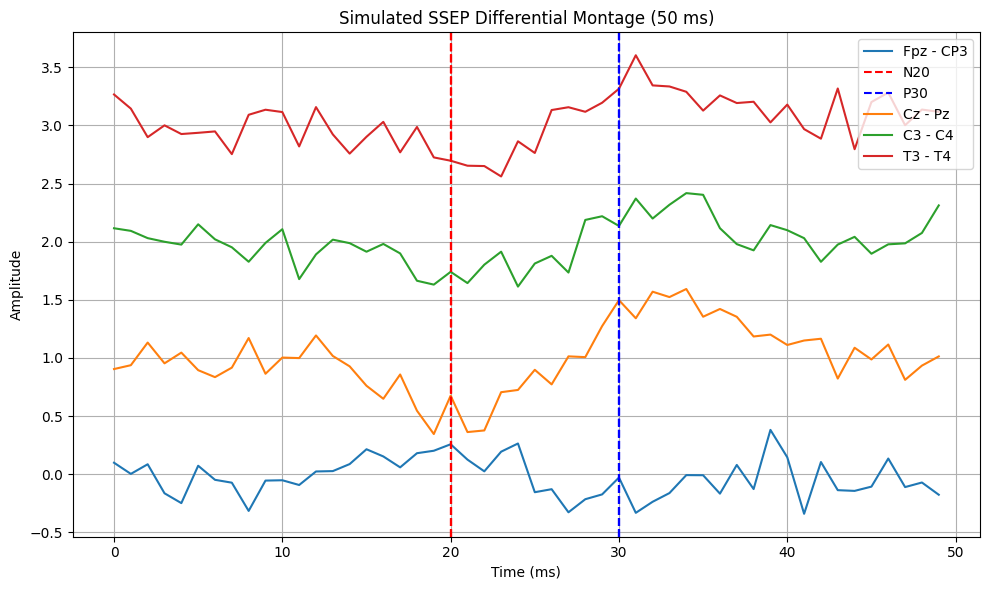

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
sampling_rate = 1000  # Hz (sampling rate)
duration = 0.05  # seconds (length of the signal, 50 ms)
time = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Generate a synthetic SSEP signal
# Basic components: evoked response (N20/P30 complex)
def generate_ssep_signal(time):
    # Simulate a Gaussian-shaped evoked potential response (e.g., N20 peak at 20 ms)
    evoked_response = np.exp(-0.5 * ((time - 0.02) / 0.005)**2)  # N20 peak at 20 ms
    # Add some noise to simulate real-world signal
    noise = np.random.normal(0, 0.1, len(time))  # Gaussian noise
    return evoked_response + noise

# Standard electrode pair montages for SSEP
electrode_pairs = [('Fpz', 'CP3'), ('Cz', 'Pz'), ('C3', 'C4'), ('T3', 'T4')]
signals = []

# Generate signals for each electrode pair
for pair in electrode_pairs:
    signal1 = generate_ssep_signal(time - np.random.uniform(0, 0.01))  # Signal from first electrode
    signal2 = generate_ssep_signal(time - np.random.uniform(0, 0.01))  # Signal from second electrode
    differential_signal = signal1 - signal2  # Subtract to get the differential signal
    signals.append((pair, differential_signal))

# Plot the signals for each electrode pair
plt.figure(figsize=(10, 6))
for i, (pair, signal) in enumerate(signals):
    plt.plot(time * 1000, signal + i * 1, label=f'{pair[0]} - {pair[1]}')  # Adjust vertical position for clarity

    # Add markers at typical SSEP peaks (N20 at 20 ms and P30 at 30 ms)
    plt.axvline(x=20, color='r', linestyle='--', label='N20')  # N20 peak at 20 ms
    plt.axvline(x=30, color='b', linestyle='--', label='P30')  # P30 peak at 30 ms

# Labeling for clarity
plt.title('Simulated SSEP Differential Montage (50 ms)')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')
plt.grid(True)

# To avoid duplicate labels, we only want one of each vertical line in the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # Remove duplicates from legend
plt.legend(by_label.values(), by_label.keys())

plt.tight_layout()
plt.show()
